## Preparing Data 



https://www.kaggle.com/hsankesara/flickr-image-dataset









In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import random
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [ ]:
  from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -U kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.15G/8.16G [03:08<00:00, 110MB/s]
100% 8.16G/8.16G [03:08<00:00, 46.5MB/s]


In [ ]:
!ls

flickr-image-dataset.zip  gdrive  sample_data


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/

In [ ]:
!ls

flickr30k_images  gdrive  sample_data


In [ ]:
data_dir = 'flickr30k_images'
image_dir = f'{data_dir}/flickr30k_images'
csv_file = f'{data_dir}/results.csv'

In [ ]:
import pandas as pd


df = pd.read_csv(csv_file, delimiter='|')
df[' comment_number'][19999] = ' 4'
df[' comment'][19999] = ' A dog runs across the grass .'
df['image_name'] = image_dir+'/'+df['image_name']
df.head(5)

,image_name,comment_number,comment
0,flickr30k_images/flickr30k_images/1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,flickr30k_images/flickr30k_images/1000092795.jpg,1,"Two young , White males are outside near many..."
2,flickr30k_images/flickr30k_images/1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,flickr30k_images/flickr30k_images/1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,flickr30k_images/flickr30k_images/1000092795.jpg,4,Two friends enjoy time spent together .


In [ ]:
print(f'[INFO] The shape of dataframe: {df.shape}')
print(f'[INFO] The columns in the dataframe: {df.columns}')
print(f'[INFO] Unique rows: {len(pd.unique(df["image_name"]))}')

[INFO] The shape of dataframe: (158915, 3)
[INFO] The columns in the dataframe: Index(['image_name', ' comment_number', ' comment'], dtype='object')
[INFO] Unique rows: 31783


In [ ]:
image_name = {
    'image_name':df[df[' comment_number'] == df[' comment_number'][0]]['image_name'].values,
}
comments = {
    'comment_0':df[df[' comment_number'] == df[' comment_number'][0]][' comment'].values,
    'comment_1':df[df[' comment_number'] == df[' comment_number'][1]][' comment'].values,
    'comment_2':df[df[' comment_number'] == df[' comment_number'][2]][' comment'].values,
    'comment_3':df[df[' comment_number'] == df[' comment_number'][3]][' comment'].values,
    'comment_4':df[df[' comment_number'] == df[' comment_number'][4]][' comment'].values,
}

image_name_df = pd.DataFrame.from_dict(image_name)
comments_df = pd.DataFrame.from_dict(comments)

df = pd.concat([image_name_df,comments_df], axis=1)
df.head(5)

,image_name,comment_0,comment_1,comment_2,comment_3,comment_4
0,flickr30k_images/flickr30k_images/1000092795.jpg,Two young guys with shaggy hair look at their...,"Two young , White males are outside near many...",Two men in green shirts are standing in a yard .,A man in a blue shirt standing in a garden .,Two friends enjoy time spent together .
1,flickr30k_images/flickr30k_images/10002456.jpg,Several men in hard hats are operating a gian...,Workers look down from up above on a piece of...,Two men working on a machine wearing hard hats .,Four men on top of a tall structure .,Three men on a large rig .
2,flickr30k_images/flickr30k_images/1000268201.jpg,A child in a pink dress is climbing up a set ...,A little girl in a pink dress going into a wo...,A little girl climbing the stairs to her play...,A little girl climbing into a wooden playhouse,A girl going into a wooden building .
3,flickr30k_images/flickr30k_images/1000344755.jpg,Someone in a blue shirt and hat is standing o...,A man in a blue shirt is standing on a ladder...,A man on a ladder cleans the window of a tall...,man in blue shirt and jeans on ladder cleanin...,a man on a ladder cleans a window
4,flickr30k_images/flickr30k_images/1000366164.jpg,"Two men , one in a gray shirt , one in a blac...",Two guy cooking and joking around with the ca...,Two men in a kitchen cooking food on a stove .,Two men are at the stove preparing food .,Two men are cooking a meal .


In [ ]:
print(f'[INFO] The shape of dataframe: {df.shape}')
print(f'[INFO] The columns in the dataframe: {df.columns}')
print(f'[INFO] Unique rows: {len(pd.unique(df["image_name"]))}')

[INFO] The shape of dataframe: (31783, 6)
[INFO] The columns in the dataframe: Index(['image_name', 'comment_0', 'comment_1', 'comment_2', 'comment_3',
       'comment_4'],
      dtype='object')
[INFO] Unique rows: 31783


<class 'str'>
['', 'Two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', '.']


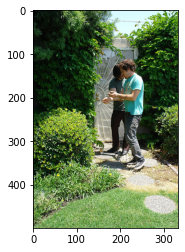

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_img = df['image_name'][0]
sample_com = df['comment_0'][0]

print(type(df['image_name'][0]))

plt.imshow(mpimg.imread(sample_img))
print(sample_com.split(' '))

In [ ]:
for id,comment in enumerate(df['comment_0']):

    clear_comment = comment.split(' ')[1:]
    comment = ' '.join(clear_comment)
    df['comment_0'][id] = comment
    
    
print(df['comment_0'][0].split())

['Two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', '.']


In [ ]:
data = df

In [ ]:
def lenght_distribution(comments):
    lens = []
    comments = comments.tolist()

    for comment in comments:
        length = len(comment.split(' '))
        lens.append(length)

    lens = np.array(lens)

    plt.hist(lens,range = (lens.min(), lens.max()),bins=lens.max()-lens.min())
    plt.grid(True)
    plt.xlabel('caption length')
    plt.show



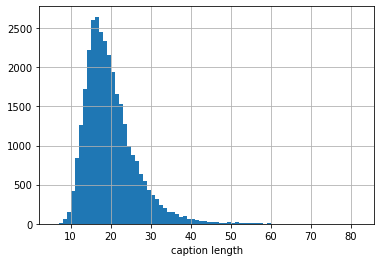

In [ ]:
lenght_distribution(df['comment_0'])

In [ ]:
data.iloc[2][5]

' A girl going into a wooden building .'

In [ ]:
len(data.columns)

6

In [ ]:
from collections import Counter

word_counts = Counter()
words = []

for img_i in range(len(data)):
    for caption_i in range(1,len(data.columns)-1):
        sentence = data.iloc[img_i][caption_i]
        words += sentence.split()
        

word_counts = Counter(words)

print(len(word_counts))

22249


In [ ]:
vocab  = ['#PAD#','#UNK#', '#START#', '#END#']
vocab += [k for k, v in word_counts.items() if v >= 5 if k not in vocab]
n_tokens = len(vocab)

assert 7000 <= n_tokens <= 8000

word_to_index = {w: i for i, w in enumerate(vocab)}

print('Vocab lenght =',n_tokens)

In [ ]:
for img_i in range(len(data)):
    for caption_i in range(1,len(data.columns)-1):
        sentence = data.iloc[img_i][caption_i] 
        data.iloc[img_i][caption_i] = ['#START#']+sentence.split(' ')+['#END#']

In [ ]:
eos_ix = word_to_index['#END#']
unk_ix = word_to_index['#UNK#']
pad_ix = word_to_index['#PAD#']

In [ ]:
print(vocab[:10])
print(word_to_index)

In [ ]:
word_to_index['a']

33

In [ ]:
tokens = []

for img_num in range(len(data)):
    capt_num = random.randint(1,5)
    tokens.append(np.array([word_to_index[word] if word in vocab else unk_ix for word in data.iloc[img_num][capt_num]]))

tokens = np.array(tokens)

x = tokens[1:5]

In [ ]:
def max_len(values):
    return max(map(len, values))

In [ ]:
def get_padded(tokens):

    max_length = max_len(tokens)
    padded = np.zeros((tokens.shape[0],max_length))

    for i,sent in enumerate(tokens):
      cur_len = len(sent)
      padded[i] = np.pad(sent, (0, max_length-cur_len), 'constant')

    return torch.from_numpy(padded)

In [ ]:
y = get_padded(x)
print(y)
print(y.shape)

In [ ]:
imgs = data.image_name.values.tolist()
print(imgs[0:3])

In [ ]:
index_to_img = {i: w for i, w in enumerate(imgs)}
print(index_to_img)

In [ ]:
img_tokens = torch.tensor([i for i in range(len(imgs))])

In [ ]:
train_imgs = img_tokens[0:int(0.85*len(imgs))]
train_tokens = tokens[0:int(0.85*len(tokens))]
val_imgs = img_tokens[int(0.85*len(imgs)):int(0.95*len(imgs))]
val_tokens = tokens[int(0.85*len(imgs)):int(0.95*len(imgs))]
test_imgs  = img_tokens[int(0.95*len(imgs)):]
test_tokens = tokens[int(0.95*len(imgs)):]

## Defining models 

https://github.com/yandexdataschool/Practical_DL/blob/master/homework04/beheaded_inception3.py

In [ ]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.models.inception import Inception3
from warnings import warn

class BeheadedInception3(Inception3):
    """ Like torchvision.models.inception.Inception3 but the head goes separately """
    
    def forward(self, x):
        if self.transform_input:
            x = x.clone()
            x[:, 0] = x[:, 0] * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x[:, 1] = x[:, 1] * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x[:, 2] = x[:, 2] * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
        else: warn("Input isn't transformed")
        x = self.Conv2d_1a_3x3(x)
        x = self.Conv2d_2a_3x3(x)
        x = self.Conv2d_2b_3x3(x)
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        x = self.Conv2d_3b_1x1(x)
        x = self.Conv2d_4a_3x3(x)
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        x = self.Mixed_5b(x)
        x = self.Mixed_5c(x)
        x = self.Mixed_5d(x)
        x = self.Mixed_6a(x)
        x = self.Mixed_6b(x)
        x = self.Mixed_6c(x)
        x = self.Mixed_6d(x)
        x = self.Mixed_6e(x)
        x = self.Mixed_7a(x)
        x = self.Mixed_7b(x)
        x_for_attn = x = self.Mixed_7c(x)
        # 8 x 8 x 2048
        x = F.avg_pool2d(x, kernel_size=8)
        # 1 x 1 x 2048
        x_for_capt = x = x.view(x.size(0), -1)
        # 2048
        x = self.fc(x)
        # 1000 (num_classes)
        return x_for_attn, x_for_capt, x
    
from torch.utils.model_zoo import load_url
def beheaded_inception_v3(transform_input=False):
    model= BeheadedInception3(transform_input=transform_input)
    inception_url = 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth'
    model.load_state_dict(load_url(inception_url))
    return model

In [ ]:
import torchvision.models as models

enc_model = beheaded_inception_v3().train(False) 

In [ ]:
for param in enc_model.parameters():
    param.requires_grad = False

In [ ]:
import spacy
import torchtext
from torchtext.data import Field
from torchtext.data import Dataset, Example
from nltk.tokenize import WordPunctTokenizer
from torchtext.data import  BucketIterator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import time
import random
import math
from tqdm import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
class Encoder(nn.Module):

  def __init__(self,emb_dim,enc_model=enc_model,out_size=8,enc_dim=2048,device=device):

      super(Encoder, self).__init__()
      self.encoder = enc_model
      self.emb_dim = emb_dim
      self.out_size = out_size
      self.linear = nn.Linear(enc_dim,emb_dim)
      self.transforms = transforms.Compose([
            transforms.Resize((299,299)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
      self.device = device

  def CustomTransform(self,batch,img2ind=False):

      images = torch.tensor([])
      
      if img2ind == True: 
          batch = [index_to_img[ind.item()] for ind in batch]

      
      for img in batch:

          image = Image.open(img).convert('RGB')
          image = self.transforms(image)
          images = torch.cat((images, image.unsqueeze(0)))

      return images 


  def forward(self,input,transforms=True):
      # out = (batch_size, 2048, out_size, out_size)

      if transforms == True:
          input = self.CustomTransform(input,img2ind=True)   #    (batch_size, 3, image_size, image_size)
      
      else: 
          input = [input]
          input = self.CustomTransform(input,img2ind=False)   #    (1, 3, image_size, image_size)

      input = input.to(self.device)

      
      output = self.encoder(input) 
                                 
      #getting output for attention
      (output_for_attn, image_vector, _ ) = output
      
      output_for_attn = output_for_attn.permute(0, 2, 3, 1)                      #(batch_size, out_size, out_size, 2048)

      output_for_attn = torch.flatten(output_for_attn, start_dim=1, end_dim=2)   #(batch_size, pixels_num, 2048)

     
                      
      image_vector = self.linear(image_vector)                #(batch_size,emb_dim)
      image_vector = image_vector.unsqueeze(0)                #(1, batch_size, emb_dim)

      return output_for_attn, image_vector 

   

In [ ]:
class Attention(nn.Module):

    def __init__(self,dec_hid_dim,att_size=8,enc_out_dim=2048,Temperature=10):
        super(Attention, self).__init__()

        self.att_size = att_size
        self.dec_hid_dim = dec_hid_dim
        self.temperature = Temperature
        self.dec_att = nn.Linear(dec_hid_dim, att_size)
        self.enc_att = nn.Linear(enc_out_dim, att_size)    
        self.att = nn.Linear(att_size, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        

    def forward(self,decoder_out,encoder_out):
        # dec_out (num_layers * num_directions, batch, hidden_size)
        # enc_out (batch_size, 64=pixels_num, 2048)

        
        att1 = self.dec_att(decoder_out.permute(1,0,2))                     # (batch_size, num_layers * num_directions, att_size)

         
        att1 = att1.mean(dim=1).unsqueeze(1)                                 # (batch_size, 1, att_size)       
                                                      
        
        att2 = self.enc_att(encoder_out)                   # (batch_size, pixels_num, att_size)
                                
        att = att1 + att2                                  # (batch_size, pixels_num ,att_size)
        att = self.att(self.tanh(self.relu(att)))          # (batch_size, pixels_num, 1)
        att = att.squeeze(2)                               # (batch_size, pixels_num)

        weights = self.softmax(att/self.temperature)             # (batch_size, pixels_num) 

        attention = encoder_out * weights.unsqueeze(2)           # (batch_size, pixels_num, 2048)
        attention = attention.mean(dim=2)                        # (batch_size, pixels_num)

        return attention 

In [ ]:
class DecoderWithAttention(nn.Module):

    def __init__(self, output_dim, emb_dim, att_size, encoder_out, dec_hid_dim, dropout, attention,num_layers=2):
        
        super(DecoderWithAttention, self).__init__()
        
        self.embedding = nn.Embedding(output_dim,emb_dim)
        self.output_dim = output_dim
        self.emb_dim = emb_dim
        self.encoder_out = encoder_out
        self.dec_hid_dim = dec_hid_dim
        self.att_size = att_size
        self.dropout = nn.Dropout(dropout)
        self.num_layers = num_layers 
        self.attention = attention 
        self.rnn = nn.LSTM(2*emb_dim + att_size,
             dec_hid_dim,num_layers=num_layers,
            dropout=dropout)

        self.out = nn.Linear(dec_hid_dim,output_dim)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, input, hidden,cell_state, encoder_outputs,image_vector):
      
        input = input.unsqueeze(0)                                          # because only one word, no words sequence 
        embedded = self.dropout(self.embedding(input))                      # (1,batch_size,emb_dim)    
        embedded = torch.cat((embedded,image_vector),dim=2)                 # (1,batch_size,emb_dim)

        # get weighted sum of encoder_outputs             
        attention = self.attention(hidden,encoder_outputs).unsqueeze(0)     # (1,batch_size,att_size)  (att_size = pixels_num)
        # concatenate weighted sum and embedded, break through the RNN
        rnn_input = torch.cat((embedded,attention),dim=2)                   # (1,batch_size, att_size + 2*emb_dim)
   

        
        rnn_out, (next_hidden, cell_state) = self.rnn(rnn_input,(hidden,cell_state))                   # (batch_size, dec_hid_dim)  

        out = self.out(rnn_out)                                             # (1,batch_size, output_dim)  
        

        return out, (next_hidden, cell_state)
        






In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device,dec_hid_dim,vocab=word_to_index,last_enc_dim=2048,pixels_num=8*8,max_len=25):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        self.max_len = max_len
        self.vocab = vocab
        self.num_layers = decoder.num_layers
        self.enc_transform = nn.Linear(last_enc_dim, dec_hid_dim)
        self.pixels_transform = nn.Linear(pixels_num, decoder.num_layers)
        self.softmax = nn.Softmax(dim=2)
        

    def forward(self, img, text,teacher_forcing_ratio = 0.5,generate_caption=False):          
        
        # src = [src sent len, batch size]
        # trg = [trg sent len, batch size]


        if generate_caption == True: 
            # only for 1 image
            max_len = self.max_len
            # tensor to store predicted words 
            words = torch.zeros(max_len)
            #tensor to store decoder outputs
            outputs = torch.tensor([])

            #first input to the decoder is the <sos> tokens
            input = torch.tensor([self.vocab['#START#']]).to(self.device)
      
            transform = False 
          


        else:
            # Again, now batch is the first dimention instead of zero
            batch_size = len(img)                        
            max_len = text.shape[0]                           # (max_len,batch_size)
            trg_vocab_size = self.decoder.output_dim

            # tensor to store predicted words 
            words = torch.zeros(max_len, batch_size).to(self.device)
            #tensor to store decoder outputs
            outputs = torch.zeros(max_len, batch_size, trg_vocab_size).to(self.device)
            
            #first input to the decoder is the <sos> tokens
            input = text[0,:].to(self.device)
            transform = True 
            

      
        #output of the encoder is used as the initial hidden state of the decoder
        enc_states,image_vector = self.encoder(img,transform)
        
        
        hidden = enc_states                                      # (batch_size, pixels_num, enc_last_dim)

        hidden = self.enc_transform(hidden)                      # (batch_size, pixels_num,dec_hid_dim) 

        hidden = hidden.permute(0,2,1)                           # (batch_size, dec_hid_dim, pixels_num)
        
        hidden = self.pixels_transform(hidden)                   # (batch_size, dec_hid_dim,num_layers)

        hidden = hidden.permute(2,0,1).contiguous()              # (num_layers, batch_size,dec_hid_dim)
         
        cell_state = hidden                              
        
        words[0] = self.vocab['#START#']
        for t in range(1,max_len):    
          
            output,(hidden,cell_state) = self.decoder(input, hidden,cell_state, enc_states,image_vector)   

            teacher_force = random.random() < teacher_forcing_ratio
            preds = self.softmax(output)
            top1 = preds.max(2)[1]
            
            if generate_caption == True:
                words[t] = int(top1[0].item())
                input = top1[0]
                

            else:
                words[t] = top1[0]
                
                outputs[t] = output[0]
                # top1 or ground truth
                input = (text[t] if teacher_force else top1[0])

        return outputs,words

In [ ]:
OUTPUT_DIM = len(vocab)
DEC_EMB_DIM = 300
DEC_HID_DIM = 512     
ATT_SIZE = 64            #  pixels_num
ENCODER_OUT = 2048
DEC_LAYERS = 4

batch_size = 32 

DEC_DROPOUT = 0.45
teacher_forcing_ratio = 0.65


enc = Encoder(DEC_EMB_DIM)
attention = Attention(DEC_HID_DIM)
dec = DecoderWithAttention(OUTPUT_DIM, DEC_EMB_DIM,ATT_SIZE,ENCODER_OUT, DEC_HID_DIM, DEC_DROPOUT, attention,DEC_LAYERS)


model = Seq2Seq(enc, dec, device,DEC_HID_DIM).to(device)

In [ ]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)
        
model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (encoder): BeheadedInception3(
      (Conv2d_1a_3x3): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2a_3x3): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2b_3x3): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (Conv2d_3b_1x1): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=Tr

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 16,640,616 trainable parameters


In [ ]:
word_counts['a']

157774

In [ ]:
vocab[4:]

In [ ]:
def get_classes_weights(vocab,gamma=0.5,device=device):
    weights = []

    for _ in vocab[:4]:
        weights.append(10**(-5))

    for word in vocab[4:]:
        weight = (word_counts[word])**(-gamma)
        weights.append(weight)
      
    weights = torch.tensor(weights).to(device)
    return weights 

In [ ]:
class_weights = get_classes_weights(vocab,gamma = 0.80)

In [ ]:
PAD_IDX = word_to_index['#PAD#']
optimizer = optim.Adam(model.parameters(),lr=2*10**(-6))
criterion = nn.CrossEntropyLoss(weight= class_weights,ignore_index = PAD_IDX)

def train(model, images,tokens, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()
    
    epoch_loss = 0
    history = []
    permutation = torch.randperm(batch_size)
    max_len = len(images)
    batch_num = 0 

    for i in range(0,max_len,batch_size):
        
        batch_num += 1 
        img = images[permutation]
        text = tokens[permutation]                 
        text = get_padded(text)                             # (batch_size,max_seq_len)
        text = text.permute(1,0)                            # (max_seq_len,batch_size)
        img, text = img.to(device), text.to(device).long()
        
        optimizer.zero_grad()
        output,_ = model(img, text,teacher_forcing_ratio)
        
        #text = [text sent len, batch size]
        #output = [trg sent len, batch size, output dim]
        
        output = output[1:].view(-1, output.shape[-1])
        trg = text[1:].contiguous()
        trg = trg.view(-1)
        
        #trg = [(trg sent len - 1) * batch size]
        #output = [(trg sent len - 1) * batch size, output dim]
        
        loss = criterion(output, trg)
        
        loss.backward()
        
        # Let's clip the gradient
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
        history.append(loss.cpu().data.numpy())
        if (batch_num+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()

        
    return epoch_loss*batch_size / len(images)

def evaluate(model, images, tokens, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    history = []
    permutation = torch.randperm(batch_size)
    max_len = len(images)
    
    with torch.no_grad():
    
        for i in range(0,max_len,batch_size):

            img = images[permutation]
            text = tokens[permutation]                 
            text = get_padded(text)                             # (batch_size,max_seq_len)
            text = text.permute(1,0)                            # (max_seq_len,batch_size)
            img, text = img.to(device), text.to(device).long()

            img, text = img.to(device), text.to(device).long()

            output,_ = model(img, text, 0) #turn off teacher forcing

            #trg = [trg sent len, batch size]
            #output = [trg sent len, batch size, output dim]

            output = output[1:].view(-1, output.shape[-1])
            trg = text[1:].contiguous()
            trg = trg.view(-1)

            #trg = [(trg sent len - 1) * batch size]
            #output = [(trg sent len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            
            epoch_loss += loss.item()
        
    return epoch_loss*batch_size / len(images)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

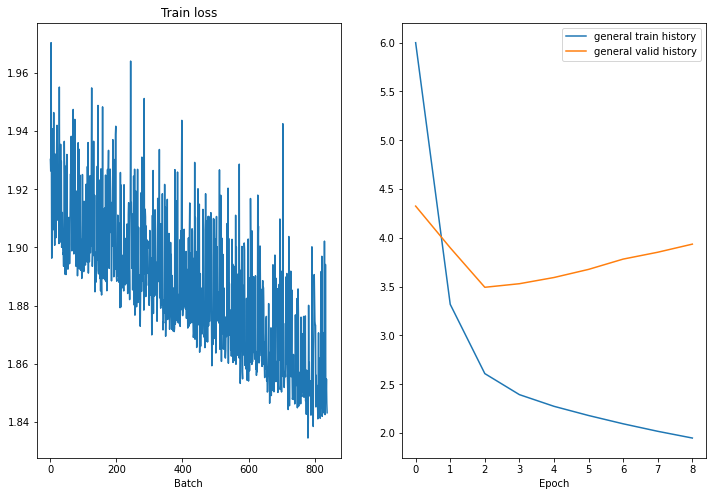

Epoch: 10 | Time: 14m 3s
	Train Loss: 1.888 | Train PPL:   6.606
	 Val. Loss: 3.997 |  Val. PPL:  54.417


In [ ]:
train_history = []
valid_history = []

N_EPOCHS = 10
CLIP = 1.0

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_imgs,train_tokens, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, val_imgs,val_tokens, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
         best_valid_loss = valid_loss
         torch.save(model.state_dict(), 'best-val-model.pt')
    
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

In [ ]:
model.load_state_dict(torch.load('best-val-model.pt'))
import matplotlib.image as mpimg
def generate_caption(img,model=model,vocab=vocab):

    caption = []
    _,words = model(img,torch.tensor([]),generate_caption=True)
    words = [vocab[int(x.item())] for x in words]
    cur_word = '#START#'
    
    for word in words[1:]:
      if word == '#END#':
          break 
      if word == cur_word or word == '#UNK#':
          pass
      else:
          cur_word = word
          caption.append(word)
       
    caption = ' '.join(caption)
    
    plt.imshow(mpimg.imread(img))
    
    return caption

In [ ]:
!wget http://ccanimalclinic.com/wp-content/uploads/2017/07/Cat-and-dog-1.jpg -O img.jpg
img = '/content/img.jpg'

--2021-02-14 15:08:39--  http://ccanimalclinic.com/wp-content/uploads/2017/07/Cat-and-dog-1.jpg
Resolving ccanimalclinic.com (ccanimalclinic.com)... 104.239.249.248
Connecting to ccanimalclinic.com (ccanimalclinic.com)|104.239.249.248|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ccanimalclinic.com/wp-content/uploads/2017/07/Cat-and-dog-1.jpg [following]
--2021-02-14 15:08:39--  https://ccanimalclinic.com/wp-content/uploads/2017/07/Cat-and-dog-1.jpg
Connecting to ccanimalclinic.com (ccanimalclinic.com)|104.239.249.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106870 (104K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 104.37K   580KB/s    in 0.2s    

2021-02-14 15:08:40 (580 KB/s) - ‘img.jpg’ saved [106870/106870]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Input isn't transformed
  app.launch_new_instance()


tensor([ 2.,  1.,  1.,  1.,  1., 33., 33., 33., 33., 20., 20., 20.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])
a .


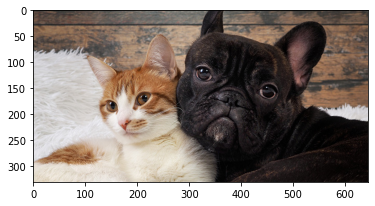

In [ ]:
capt = generate_caption(img)
print(capt)

In [ ]:
!wget https://pixel.nymag.com/imgs/daily/selectall/2018/02/12/12-tony-hawk.w710.h473.jpg -O img.jpg
img = '/content/img.jpg'

--2021-02-14 15:08:45--  https://pixel.nymag.com/imgs/daily/selectall/2018/02/12/12-tony-hawk.w710.h473.jpg
Resolving pixel.nymag.com (pixel.nymag.com)... 199.232.192.70, 199.232.196.70
Connecting to pixel.nymag.com (pixel.nymag.com)|199.232.192.70|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pyxis.nymag.com/v1/imgs/6ac/2a6/b48d3a180f333298f5bee60ff80f4ba886-12-tony-hawk.h473.w710.jpg [following]
--2021-02-14 15:08:45--  https://pyxis.nymag.com/v1/imgs/6ac/2a6/b48d3a180f333298f5bee60ff80f4ba886-12-tony-hawk.h473.w710.jpg
Resolving pyxis.nymag.com (pyxis.nymag.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to pyxis.nymag.com (pyxis.nymag.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54731 (53K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  53.45K  --.-KB/s    in 0.006s  

2021-02-14 15:08:45 (8.09 MB/s) - ‘img.jpg’ saved [54731